In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [6]:
df = pd.read_csv('D:/PycharmProjects/pythonProject/train_test_combine_wo_lag.csv',header = 0)
features = ['Ammonia Nitrogen','NOx','Dissolved Oxygen','pH','Water Temperature','Turbidity','Total Phosphorus','Air Temperature','Specific Humidity','Wind Speed','Precipitation','Shortwave radiation flux','Developed Percent']
x = df.drop(columns=['Agricultural Percent','Chl_current'])
y = df["Chl_current"]

In [7]:
x.head()

,Ammonia Nitrogen,NOx,Dissolved Oxygen,pH,Water Temperature,Turbidity,Total Phosphorus,Air Temperature,Specific Humidity,Wind Speed,Precipitation,Shortwave Radiation Flux,Developed Percent
0,0.120000,0.010000,6.920000,7.94,24.120000,0.500000,0.004000,20.610000,0.012005,1.269212,80.1024,170.950,0.950742
1,0.082718,0.070539,7.040000,8.03,21.970000,0.901990,0.007586,22.730000,0.013627,2.976928,56.9728,210.145,0.950742
2,0.060000,0.020000,6.633333,8.04,26.016667,0.500000,0.006000,24.400000,0.014794,2.124735,69.8112,248.080,0.950742
3,0.080370,0.070048,6.820000,7.99,24.906667,1.019418,0.007491,24.030039,0.013869,1.518190,136.8320,244.566,0.950742
4,0.110000,0.030000,5.820000,8.00,27.086667,1.000000,0.007000,26.550000,0.016619,2.083387,104.5632,272.162,0.950742


In [8]:
features = list(x.columns)
features

['Ammonia Nitrogen',
 'NOx',
 'Dissolved Oxygen',
 'pH',
 'Water Temperature',
 'Turbidity',
 'Total Phosphorus',
 'Air Temperature',
 'Specific Humidity',
 'Wind Speed',
 'Precipitation',
 'Shortwave Radiation Flux',
 'Developed Percent']

In [9]:
# train data are from 1997 to 2015, test data are from 2016 to 2020
# train 79% test 21%

# original data without transforming
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

'''
Xtrain = train_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Xtest = test_data.drop(columns=['Agricultural Percent','Chl_1m_lag'])
Ytrain = train_data["Chl_1m_lag"]
Ytest = test_data["Chl_1m_lag"]
'''

'\nXtrain = train_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nXtest = test_data.drop(columns=[\'Agricultural Percent\',\'Chl_1m_lag\'])\nYtrain = train_data["Chl_1m_lag"]\nYtest = test_data["Chl_1m_lag"]\n'

In [10]:
Xtrain = x[:2736]
Ytrain = y[:2736]
Xtest = x.tail(720)
Ytest = y.tail(720)

In [8]:
# Grid search
# Origin data
best_score = 0
for n_estimators in [100,200,400]:
    for criterion in ['squared_error','absolute_error','poisson']:
        for max_depth in [10,50,100,200,400]:
            for min_samples_split in [2,4,8,16]:
                for min_samples_leaf in [1,2,4,8]:
                    for max_features in [0.8,0.9,1.0]:


                        RFR = RandomForestRegressor(n_estimators = n_estimators, criterion = criterion,max_depth = max_depth, 
                                                    min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf,
                                                   max_features = max_features)

                        RFR.fit(Xtrain,Ytrain)
                        score = RFR.score(Xtest,Ytest)
                        if score > best_score:
                            best_score = score
                            best_parameters = {'n_estimators':n_estimators,'criterion':criterion,'max_depth':max_depth,
                                              'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf,
                                               'max_features':max_features}


print("Best score:{:.3f}".format(best_score))
print("Best parameters:{}".format(best_parameters))

# Origin data

Best score:0.442
Best parameters:{'n_estimators': 100, 'criterion': 'absolute_error', 'max_depth': 50, 'min_samples_split': 4, 'min_samples_leaf': 8, 'max_features': 0.8}


In [15]:
# RFR

# 1.Model
RFR = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=50, min_samples_split=4, 
                            min_samples_leaf=8, max_features=0.8)

# 2.Train
RFR.fit(Xtrain,Ytrain)

# 3.Scores
y_predict_xtrain = RFR.predict(Xtrain)
y_predict_xtest = RFR.predict(Xtest)

score_train = metrics.r2_score(Ytrain, y_predict_xtrain)
score_test = metrics.r2_score(Ytest, y_predict_xtest)
MAE_train = metrics.mean_absolute_error(Ytrain, y_predict_xtrain)
MAE_test = metrics.mean_absolute_error(Ytest, y_predict_xtest)
MSE_train = metrics.mean_squared_error(Ytrain, y_predict_xtrain)
MSE_test = metrics.mean_squared_error(Ytest, y_predict_xtest)
MAPE_train = metrics.mean_absolute_percentage_error(Ytrain, y_predict_xtrain)
MAPE_test = metrics.mean_absolute_percentage_error(Ytest, y_predict_xtest)

print('R2 for train:', score_train)
print('R2 for test:', score_test)
print('MAE for train:', MAE_train)
print('MAE for test:', MAE_test)
print('MSE for train:', MSE_train)
print('MSE for test:', MSE_test)
print('MAPE for train', MAPE_train)
print('MAPE for test', MAPE_test)

R2 for train: 0.6895105082572064
R2 for test: 0.4307725047811921
MAE for train: 0.45144198452544415
MAE for test: 0.7444239785105763
MSE for train: 0.9271768685714974
MSE for test: 1.6059494985596527
MAPE for train 0.4727346096053063
MAPE for test 0.5837917294615748


In [26]:
RFR.fit(Xtrain,Ytrain)

RandomForestRegressor(criterion='absolute_error', max_depth=50,
                      max_features=0.8, min_samples_leaf=8,
                      min_samples_split=4)

In [35]:
# same as MAPE
PercentBias_train = np.mean(np.abs((Ytrain - y_predict_xtrain) / Ytrain)) * 100
PercentBias_train

47.97861406417321

In [38]:
importance = RFR.feature_importances_
print(importance)
print([*zip(features,RFR.feature_importances_)])

[0.02767666 0.09884154 0.0444886  0.06638879 0.04177084 0.10415285
 0.16726372 0.02000786 0.02539098 0.02052152 0.02234989 0.02353124
 0.33761551]
[('Ammonia Nitrogen', 0.0276766641215011), ('NOx', 0.0988415381370931), ('Dissolved Oxygen', 0.044488597774436436), ('pH', 0.06638879413706063), ('Water Temperature', 0.041770838233152655), ('Turbidity', 0.1041528473832064), ('Total Phosphorus', 0.16726372175805923), ('Air Temperature', 0.020007856186617858), ('Specific Humidity', 0.025390979381207986), ('Wind Speed', 0.020521523890643545), ('Precipitation', 0.022349887825366604), ('Shortwave Radiation Flux', 0.023531241314036024), ('Developed Percent', 0.3376155098576185)]


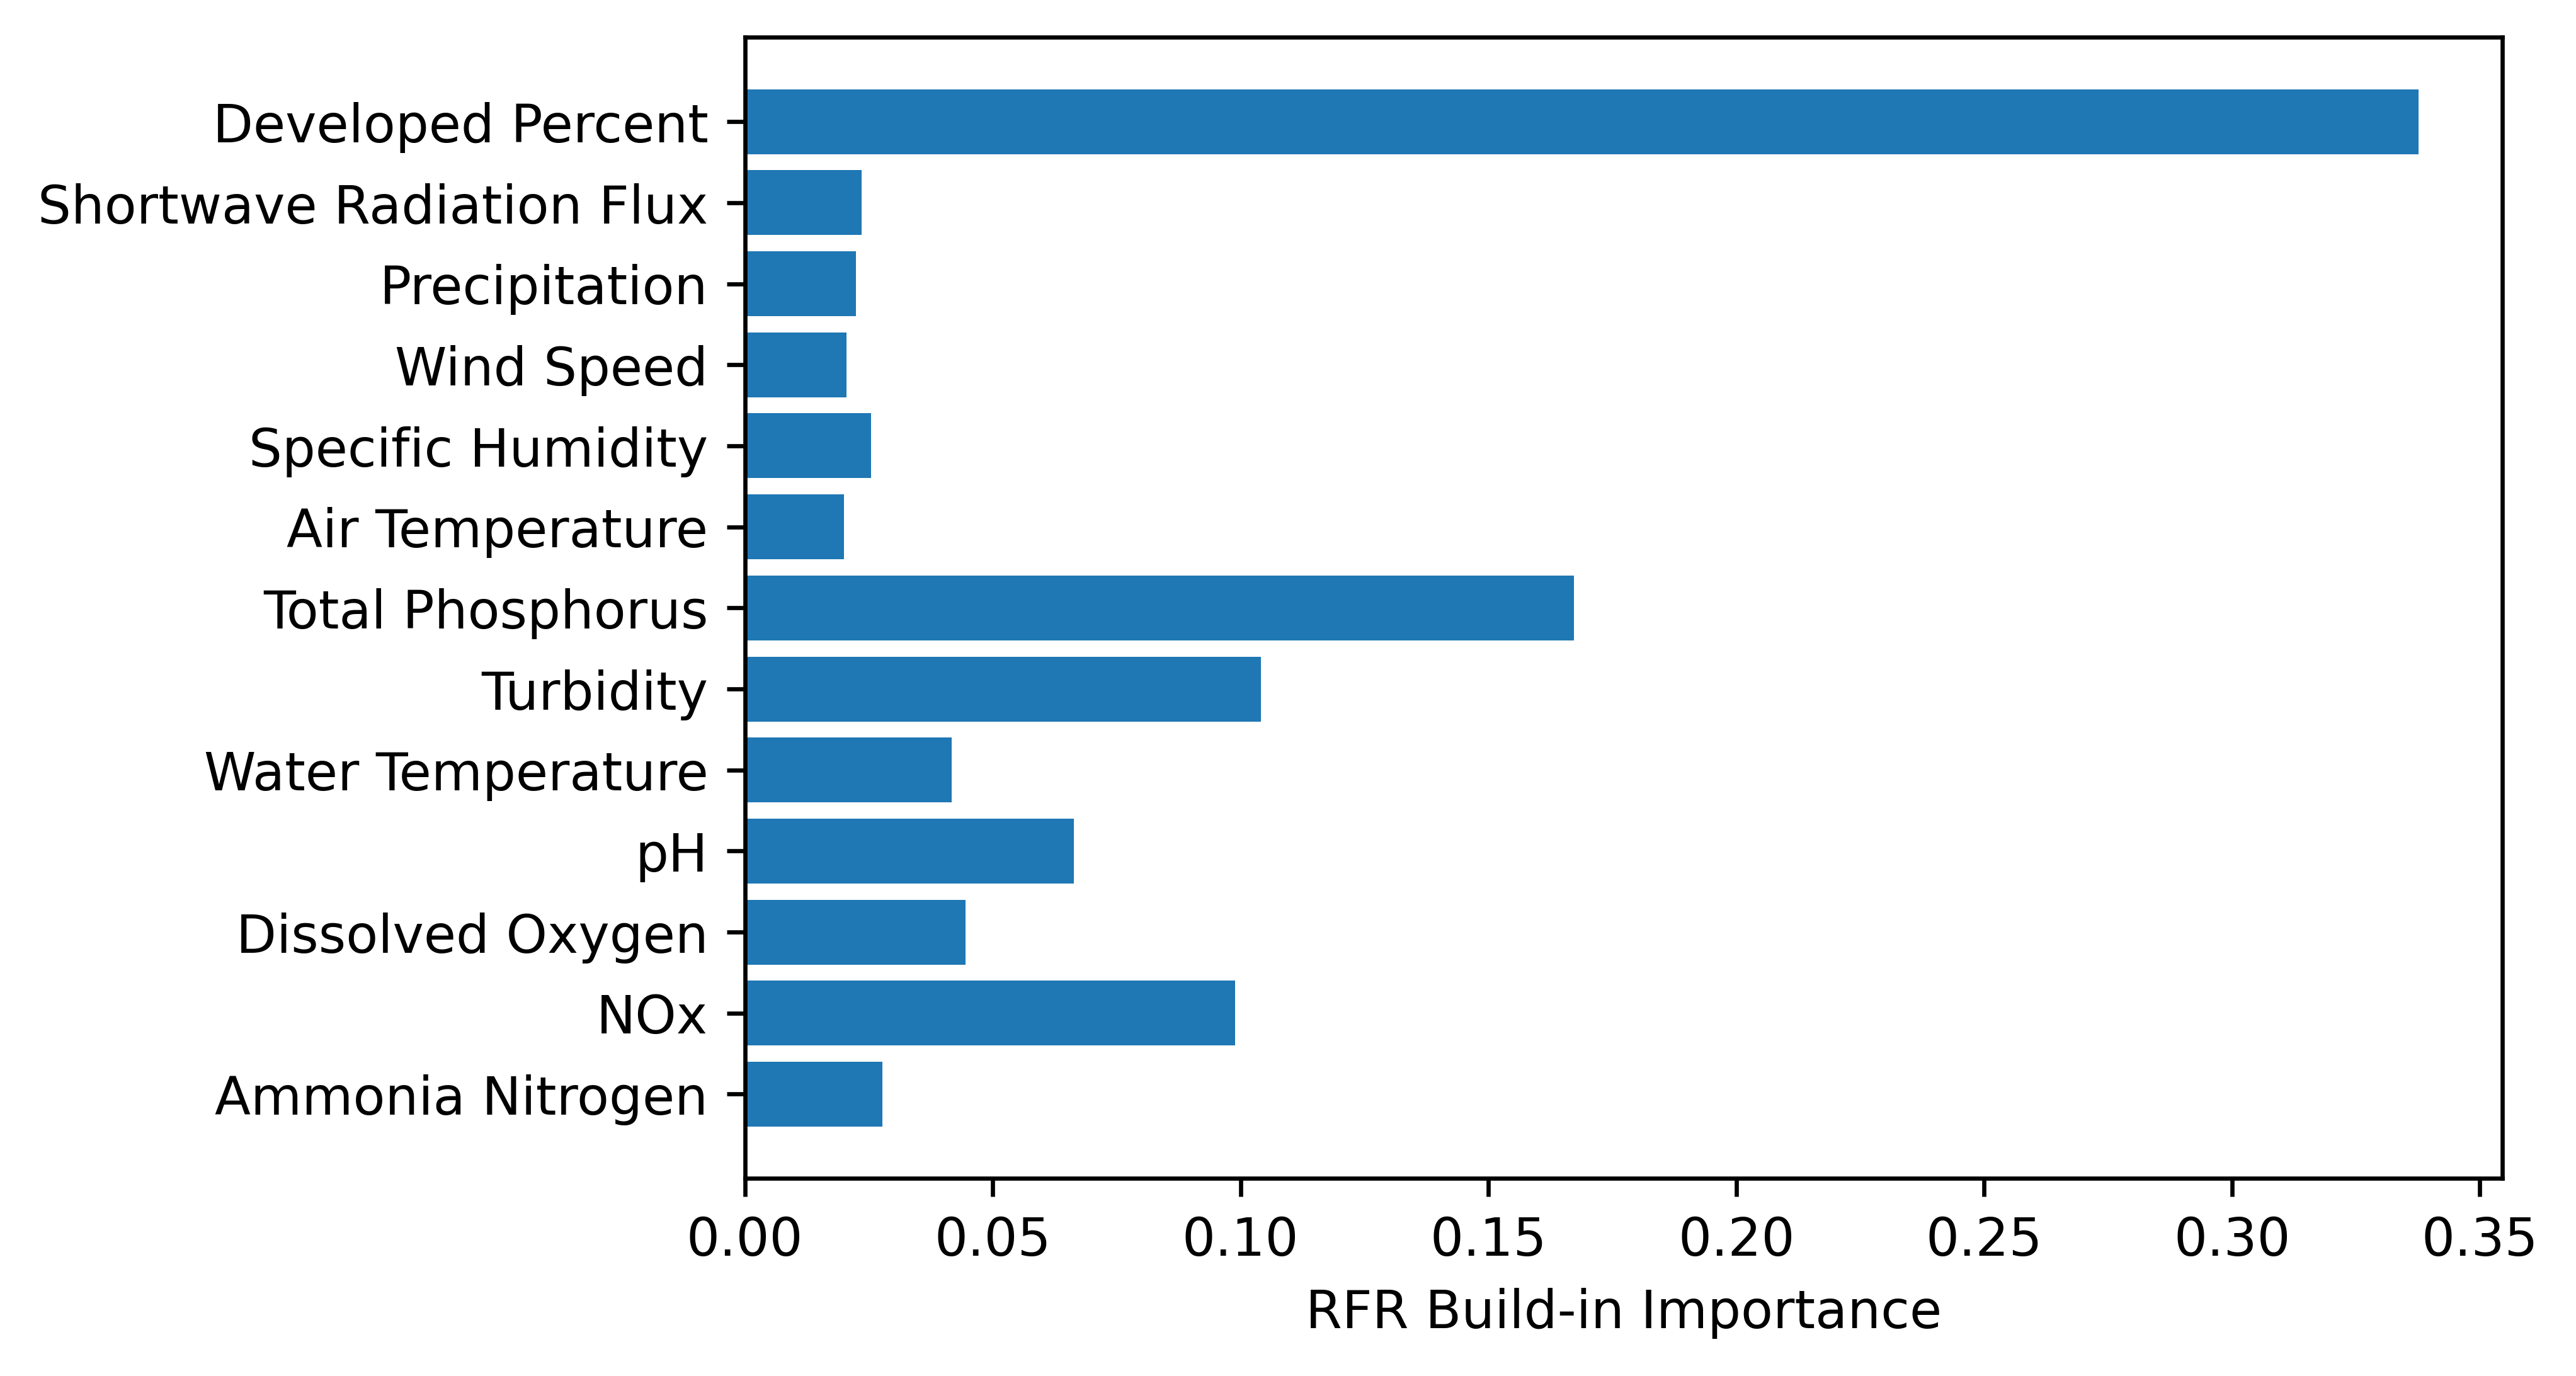

In [39]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
# create dataset
height = RFR.feature_importances_
bars = (features)
plt.figure(dpi=600)
plt.xlabel('RFR Build-in Importance')
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
# Create names on the x-axis
plt.yticks(y_pos, bars)
# Show graphic
plt.show()

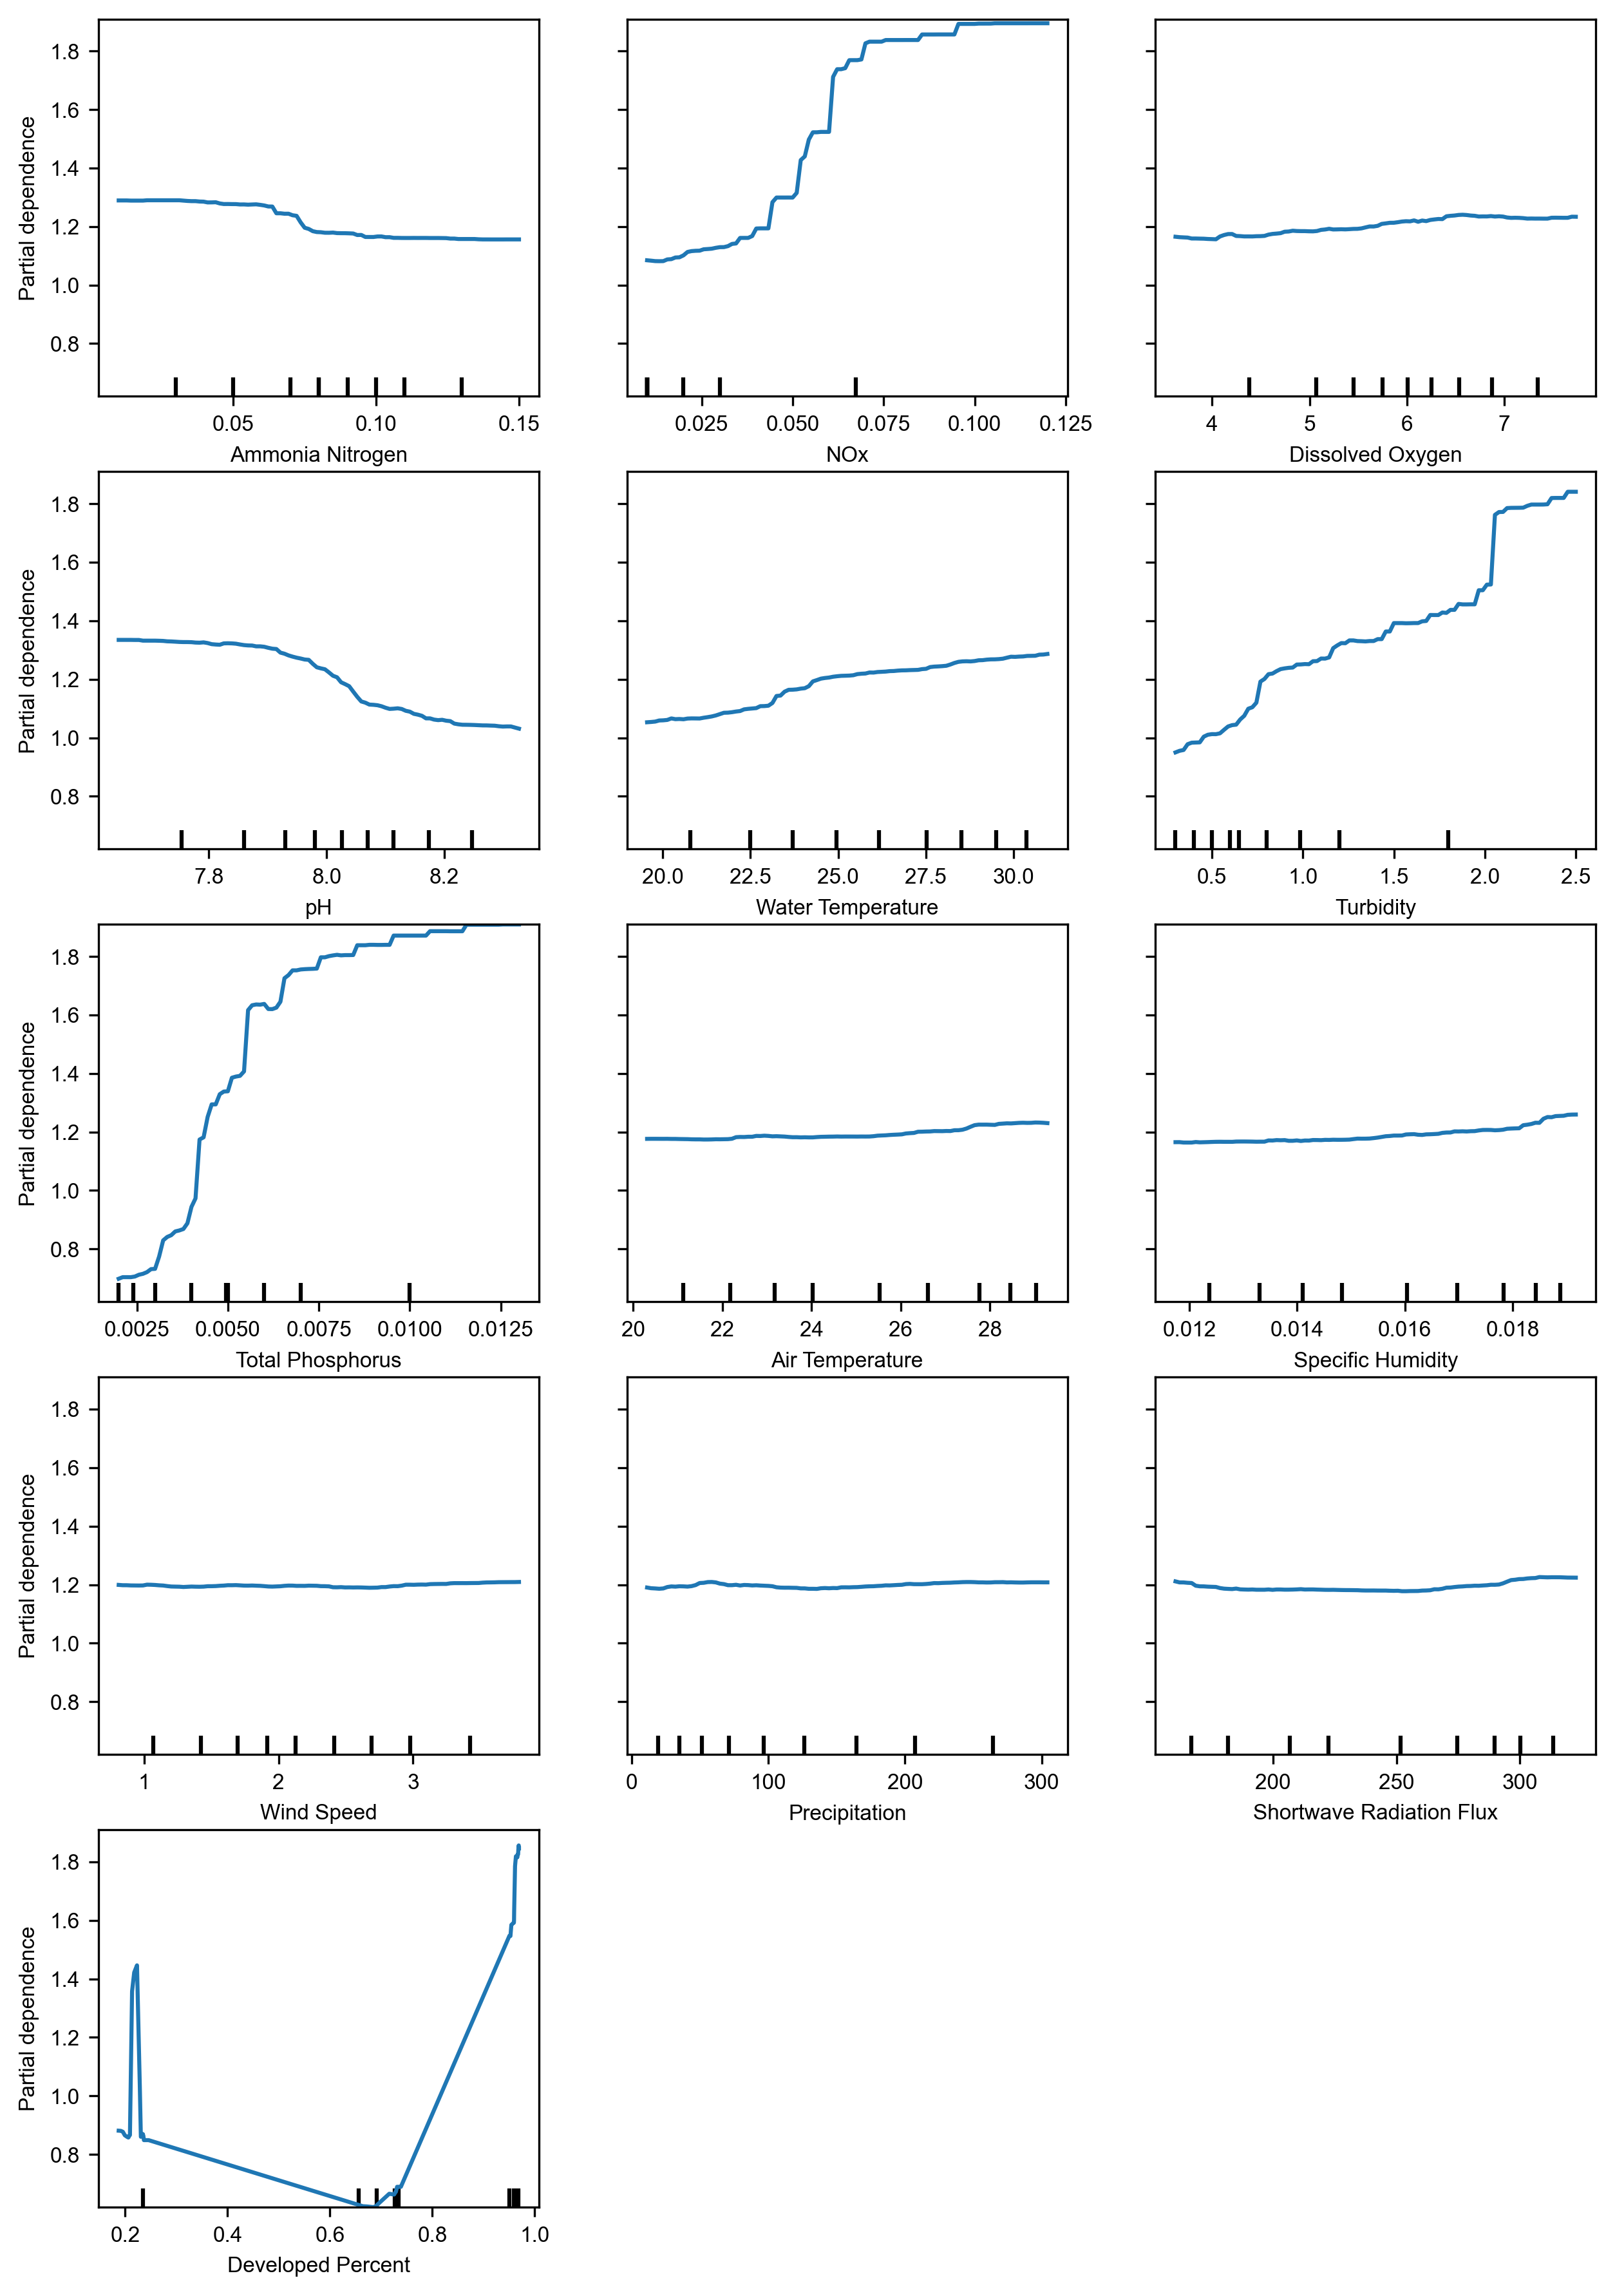

In [59]:
from sklearn.inspection import PartialDependenceDisplay
plt.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':300,'font.size': 8,'font.family':'arial'})
disp1 = PartialDependenceDisplay.from_estimator(RFR, x,
                                                [0,1,2,3,4,5,6,7,8,9,10,11,12])

[ 0.02219417  0.09765773  0.02108548  0.00328197  0.03192283  0.02802774
  0.15422797  0.00085607  0.00247745 -0.00141569  0.00419099  0.00174252
  0.33214221]


Text(0.5, 0, 'RFR Permutation Importance')

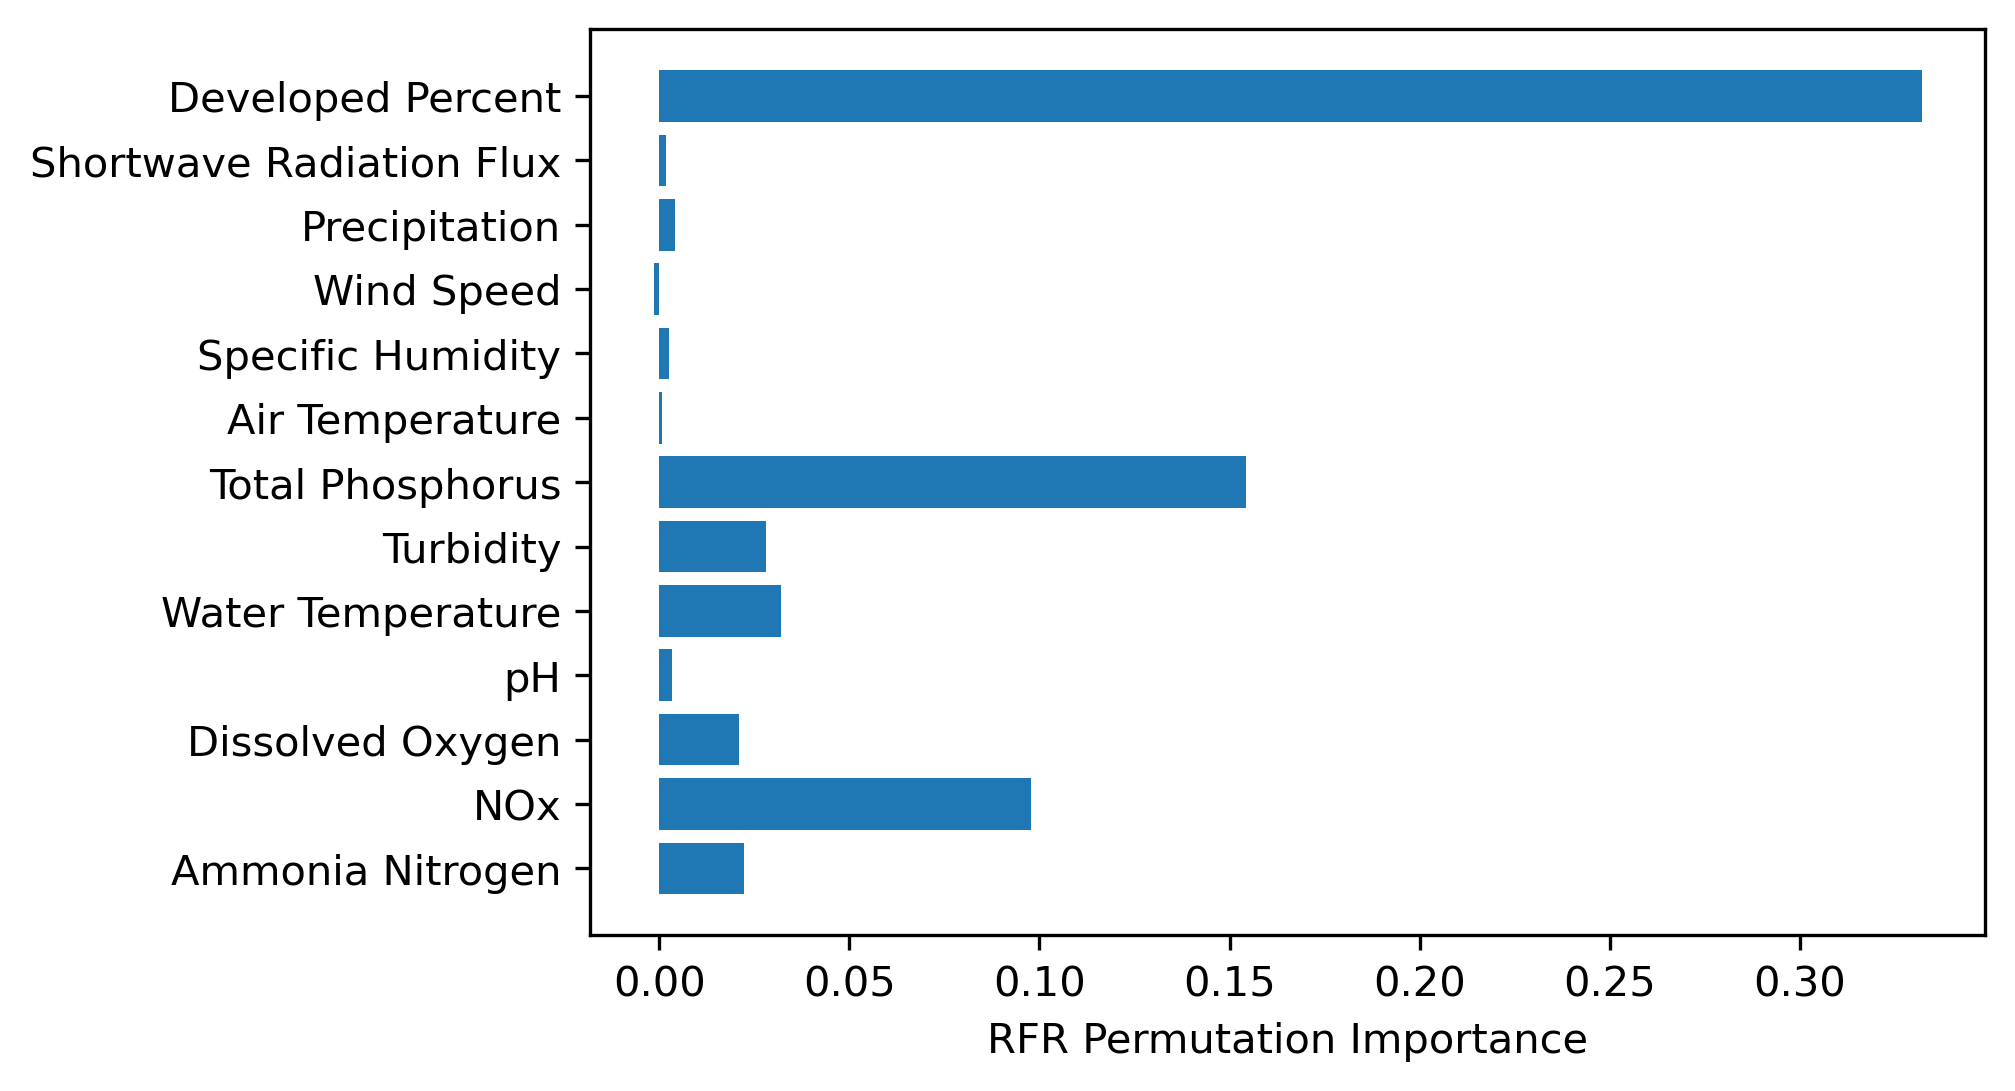

In [40]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(RFR, Xtest, Ytest)
print(perm_importance.importances_mean)
# sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(dpi=300)
plt.barh(features, perm_importance.importances_mean)
plt.xlabel("RFR Permutation Importance")

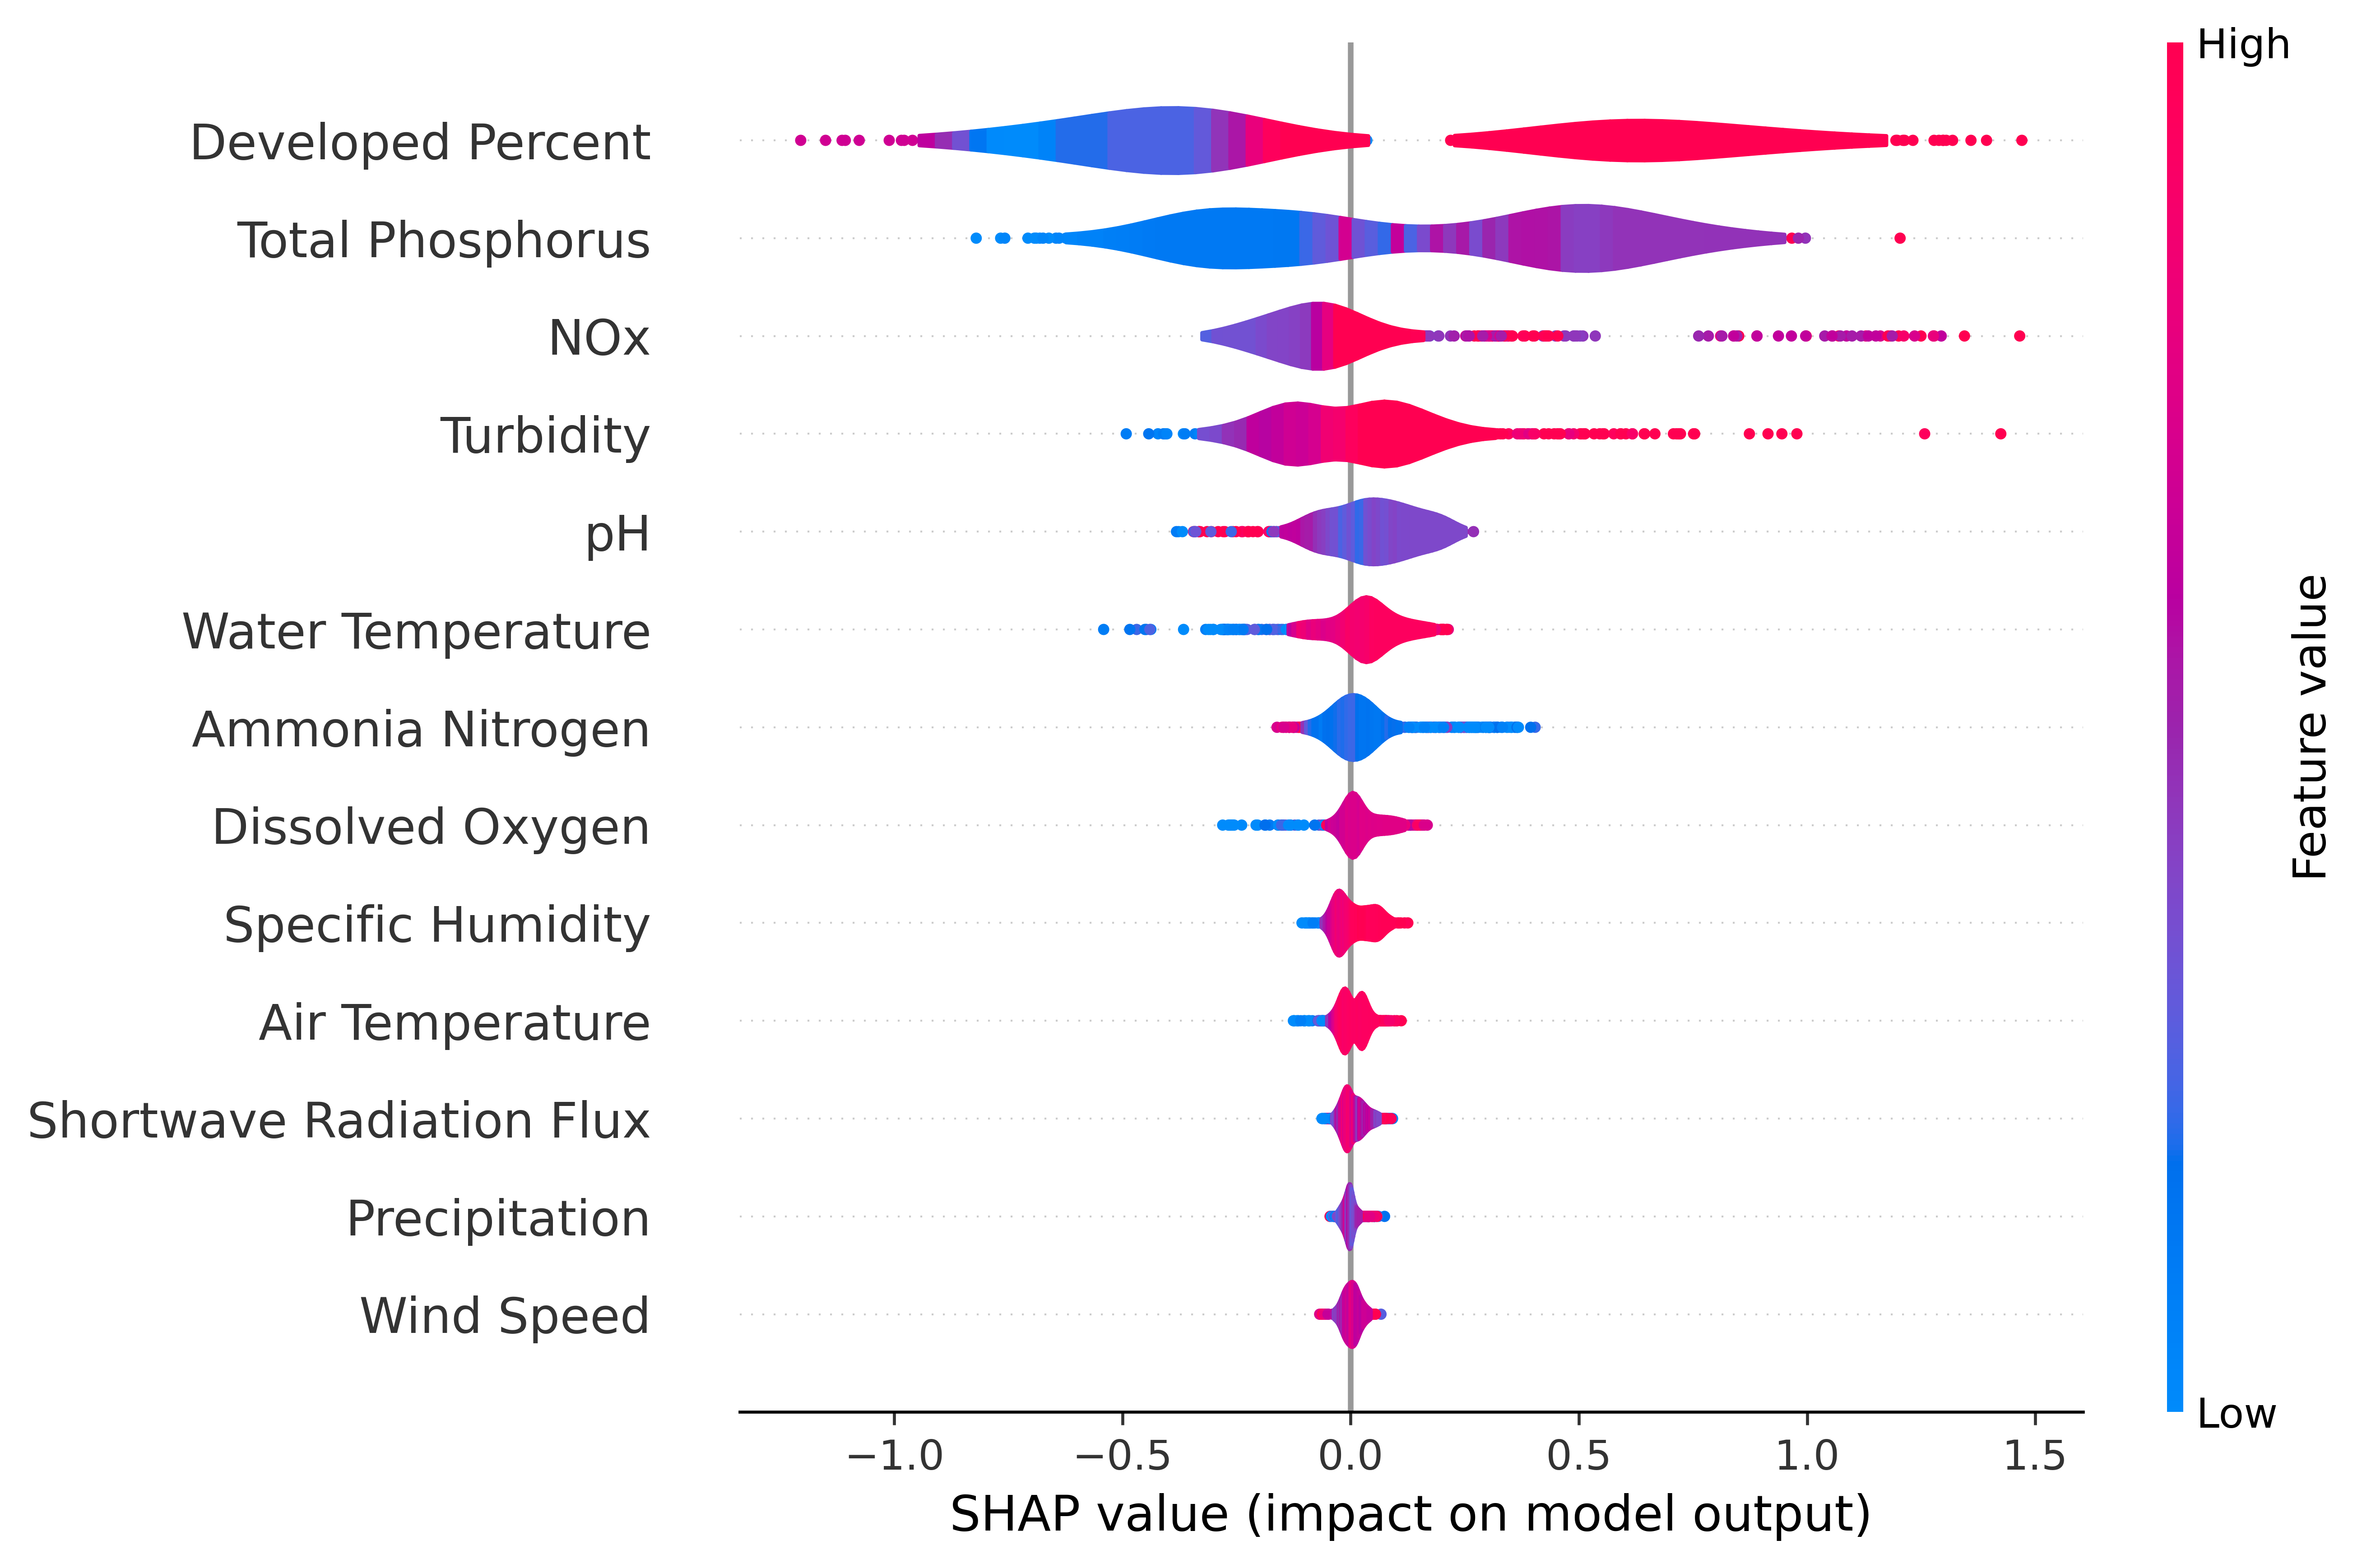

In [41]:
import shap
explainer = shap.TreeExplainer(RFR)
shap_values = explainer.shap_values(Xtest)
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest, plot_type="violin")

In [44]:
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([Xtest.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

,column_name,shap_importance
12,Developed Percent,0.552224
6,Total Phosphorus,0.383872
1,NOx,0.173604
5,Turbidity,0.160569
3,pH,0.096545
4,Water Temperature,0.080472
0,Ammonia Nitrogen,0.07781
2,Dissolved Oxygen,0.04079
8,Specific Humidity,0.035819
7,Air Temperature,0.026516


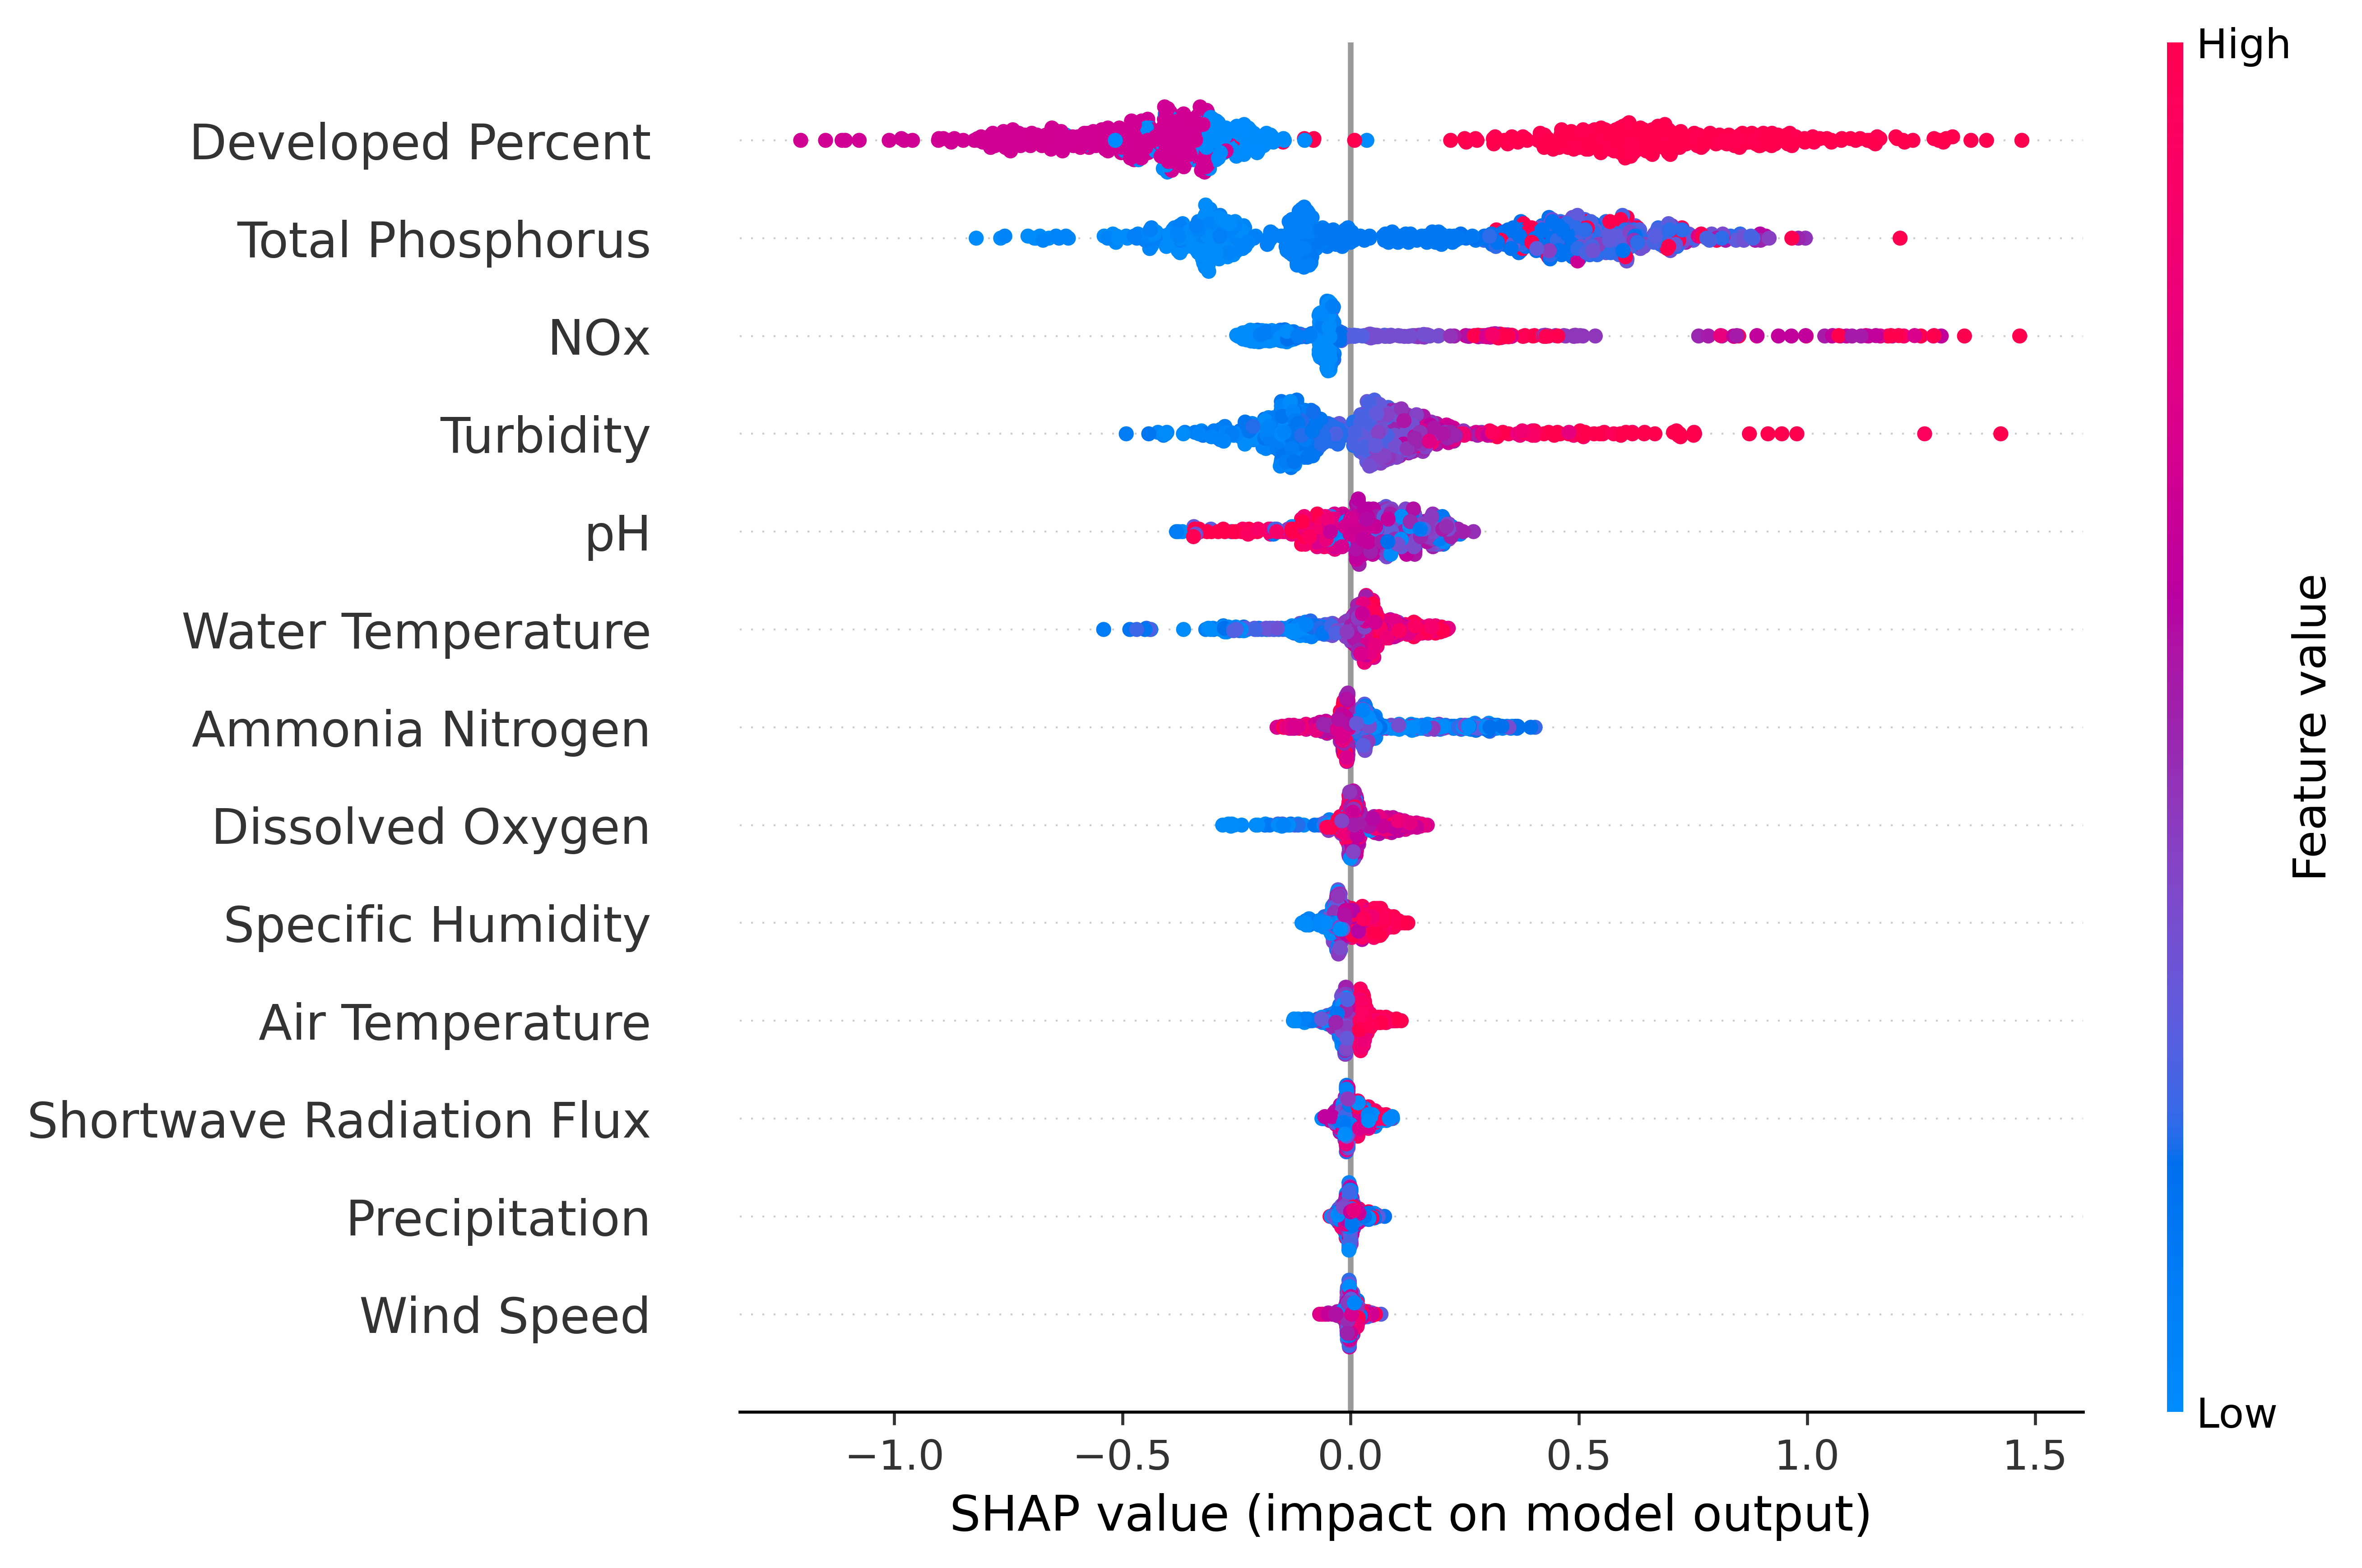

In [43]:
plt.figure(dpi=600)
shap.summary_plot(shap_values, Xtest)

In [45]:
m = pd.Series(y_predict_xtrain, index=Ytrain.index, name='Predicted Chlorophyll-a')

In [46]:
AllY_train = pd.concat([Ytrain,m],axis=1)
AllY_train

,Chl_current,Predicted Chlorophyll-a
0,2.540000,1.539969
1,3.759632,3.090569
2,2.860000,1.935530
3,3.692863,3.566909
4,5.130000,1.991997
...,...,...
2731,1.400000,0.872522
2732,0.860000,0.816445
2733,0.460000,0.575466
2734,0.540000,0.609566


In [47]:
n = pd.Series(y_predict_xtest, index=Ytest.index, name='Predicted Chlorophyll-a')

In [48]:
AllY_test = pd.concat([Ytest,n],axis=1)
AllY_test

,Chl_current,Predicted Chlorophyll-a
2736,3.080000,4.214752
2737,6.830000,2.507895
2738,4.349878,2.647007
2739,2.740000,2.289354
2740,2.210000,1.717969
...,...,...
3451,0.600000,0.760646
3452,0.480000,0.721814
3453,0.630000,0.658397
3454,0.930000,0.716830


In [49]:
All_Y = pd.concat([AllY_train,AllY_test],ignore_index = True)
All_Y_sorted = All_Y.sort_index()
All_Y_sorted

,Chl_current,Predicted Chlorophyll-a
0,2.540000,1.539969
1,3.759632,3.090569
2,2.860000,1.935530
3,3.692863,3.566909
4,5.130000,1.991997
...,...,...
3451,0.600000,0.760646
3452,0.480000,0.721814
3453,0.630000,0.658397
3454,0.930000,0.716830


In [50]:
All_Y.loc[0]

Chl_current                2.540000
Predicted Chlorophyll-a    1.539969
Name: 0, dtype: float64

In [51]:
All_Y_sorted.to_excel (r'C:/Users/yanzh/OneDrive - Florida State Students/桌面/export_dataframe.xlsx', index = False, header=True)

In [ ]:
import os
import joblib
joblib.dump(RFR, "./RFR_wolag.joblib")

In [2]:
import os
import joblib
loaded_rfr = joblib.load("./RFR_wolag.joblib")

In [11]:
# original
aaaa = loaded_rfr.predict(x)

In [12]:
aaaa

array([1.53996901, 3.09056939, 1.9355297 , ..., 0.65839672, 0.71682965,
       0.67829666])

In [13]:
len(aaaa)

3456